### 1. Load the dataset

**[1.1] Automatic reload modules**

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**[1.2] Import packages**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump

**[1.3] Load the datasets**

In [19]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val   = pd.read_csv('../data/processed/X_val.csv')
X_test  = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val   = pd.read_csv('../data/processed/y_val.csv')
y_test = pd.read_csv('../data/interim/y_test.csv')

In [20]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(33001, 58)
(8251, 58)
(4970, 58)


In [21]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### 2. Train Gradient Boosting Default Model

**[2.1] Instantiate and fit the model**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=8)

In [23]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=8)

**[2.2] Make prediction on training data**

In [24]:
y_train_pred = gb.predict_proba(X_train)[:, 1]
y_val_pred = gb.predict_proba(X_val)[:, 1]

**[2.3] Performance metric - AUROC**

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [26]:
print("Train - AUROC:\n", f'{roc_auc_score(y_train, y_train_pred):.4f}')
print("Val - AUROC:\n", f'{roc_auc_score(y_val, y_val_pred):.4f}')

Train - AUROC:
 0.9998
Val - AUROC:
 0.9986


**Plot the AUROC curve**

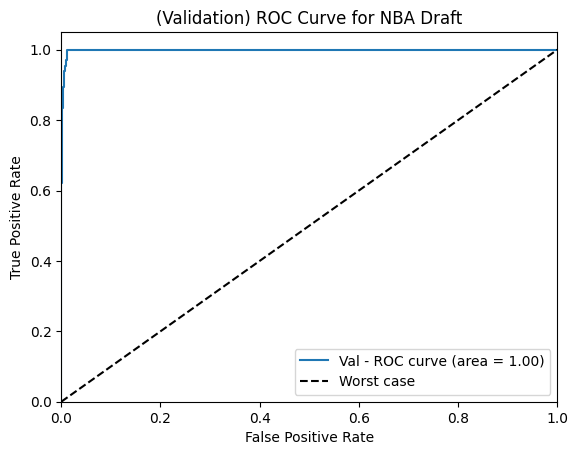

In [27]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Val - ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Worst case')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(Validation) ROC Curve for NBA Draft')
plt.legend()
plt.show()

**[2.4] Predict on test data**

In [28]:
y_test_pred = gb.predict_proba(X_test)[:, 1]

#Dataframe for pred result
y_pred = y_test
y_pred.loc[:, 'drafted'] = y_test_pred

print(y_pred.describe().round(5))

y_pred = pd.DataFrame(y_pred)

#Save the result to CSV file
y_pred.to_csv('../data/external/at1_pred_week3.1.csv', index=False)

          drafted
count  4970.00000
mean      0.00563
std       0.06458
min       0.00008
25%       0.00011
50%       0.00011
75%       0.00011
max       0.99960


### 3. Feature Importance

In [29]:
feature = gb.feature_importances_

In [30]:
#Dataframe of feature importance
feat_imp_rf_df = pd.DataFrame(
    {'feature': X_train.columns,
     'feature_importance': feature})

In [31]:
#Sort the dataframe
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [32]:
#Visualize the feature importance
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance']
)

alt.Chart(...)